In [36]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string
import gensim.downloader as api
import plotly.express as px
from sklearn.decomposition import PCA

Before proceeding check you have downloaded the following:
1. A pre-trained model word vector model and have it saved in your path_model directory.
2. Installed Spacy and an associated model.
3. Downloaded a sample of text to analyse ( we use gutenberg_shakespear.txt, linked in this repo)


For help on how to do this, consult the repo README.

In [37]:
# Load in models
path_model="Q:\\Oflog\\NLP\\Inputs\\Pretrained_WE_models\\"
wv = KeyedVectors.load(path_model+"vectors_word2vec-google-news-300.kv")
nlp = spacy.load("en_core_web_sm")

In [47]:
# Load in data
df=pd.read_csv("gutenberg_shakespear.txt", sep=' \t', header=None, engine='python')
doc=nlp(df.to_string())
doc


                                                            0
0                       Lord of my love, to whom in vassalage
1                       Thy merit hath my duty strongly knit;
2                       To thee I send this written embassage
3                        To witness duty, not to show my wit.
4                    Duty so great, which wit so poor as mine
5            May make seem bare, in wanting words to show it;
6                  But that I hope some good conceit of thine
7           In thy soul's thought (all naked) will bestow it:
8                 Till whatsoever star that guides my moving,
9                   Points on me graciously with fair aspect,
10                    And puts apparel on my tattered loving,
11                    To show me worthy of thy sweet respect,
12               Then may I dare to boast how I do love thee,
13     Till then, not show my head where thou mayst prove me.
14                                                         27
15      

### Clean and lemmatize the data
#### We remove stops, punctuation, spaces, and numbers

In [57]:
cleaned_txt_lemma=[token.lemma_.lower() for token in doc if not token.is_stop \
                        and not token.is_punct\
                        and not token.is_space\
                        and not token.is_digit\
                        and not token.like_num]

### Check to see whether our model is appropriate for our dataset
#### An appropriate model will know the majority of words in the sample. An appropriate model will also have a good understanding of the most commonly used words; this can be manually tested by examining word similarity etc.

In [53]:
# Filter the words that are in the model
words_in_model = [word for word in cleaned_txt_lemma if word in wv]
words_not_in_model=[word for word in cleaned_txt_lemma if word not in wv]

print(round(100*len(words_in_model)/len(cleaned_txt_lemma),1), '% of words in our corpus are in the models vocabulary')
print(round(100*len(words_not_in_model)/len(cleaned_txt_lemma),1), '% of words in our corpus are not in the models vocabulary')
print('Some words that are in our models vocabulary include:', words_in_model[-5:])
print('Some words that are not in our models vocabulary include:', words_not_in_model[-5:])

97.2 % of words in our corpus are in the models vocabulary
2.8 % of words in our corpus are not in the models vocabulary
Some words that are in our models vocabulary include: ['mind', 'grief', 'lie', 'onward', 'joy']
Some words that are not in our models vocabulary include: ['canst', 'mayst', "stol'n", 'thievish', 'uprear']


### Perform Principle Component Analysis (PCA)

In [55]:
#PCA fitting
sample_vectors = np.array([wv[word] for word in words_in_model])
pca = PCA(n_components=3)
result = pca.fit_transform(sample_vectors)

### Plotting

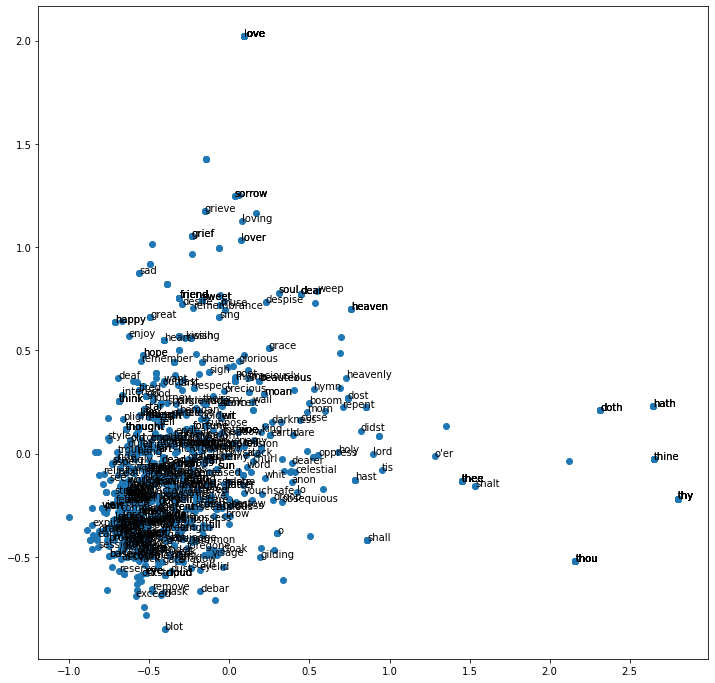

In [45]:
# Plot
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words_in_model[0:500]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

#### Note how similar words are approximately clustered.
#### Note again how similar in this context mean 'often appear together'. Therefore 'Sad' and 'Happy' are clustered closely while being antonyms. Words that are unlikely to be used in the same context, e.g. 'gilding' and 'deaf' are seperated in space.

In [56]:
#Optional' visualise in 3D space
fig2 = px.scatter_3d(x=result[:500,0], y=result[:500,1], z=result[:500,2], opacity=0.5, text=words_in_model[:500])
fig2.show()